# Gredient Boosting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.DataFrame()

In [3]:
df

""


In [24]:
np.random.seed(42)

In [25]:
X=np.random.rand(100,1)-0.5

In [26]:
X

array([[-0.12545988],
       [ 0.45071431],
       [ 0.23199394],
       [ 0.09865848],
       [-0.34398136],
       [-0.34400548],
       [-0.44191639],
       [ 0.36617615],
       [ 0.10111501],
       [ 0.20807258],
       [-0.47941551],
       [ 0.46990985],
       [ 0.33244264],
       [-0.28766089],
       [-0.31817503],
       [-0.31659549],
       [-0.19575776],
       [ 0.02475643],
       [-0.06805498],
       [-0.20877086],
       [ 0.11185289],
       [-0.36050614],
       [-0.20785535],
       [-0.13363816],
       [-0.04393002],
       [ 0.28517596],
       [-0.30032622],
       [ 0.01423444],
       [ 0.09241457],
       [-0.45354959],
       [ 0.10754485],
       [-0.32947588],
       [-0.43494841],
       [ 0.44888554],
       [ 0.46563203],
       [ 0.30839735],
       [-0.19538623],
       [-0.40232789],
       [ 0.18423303],
       [-0.05984751],
       [-0.37796177],
       [-0.00482309],
       [-0.46561148],
       [ 0.4093204 ],
       [-0.24122002],
       [ 0

In [27]:
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [28]:
df["X"]=X.reshape(100)

In [29]:
df["y"]=y

In [30]:
df.head()

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986


Text(0.5, 1.0, 'X vs y')

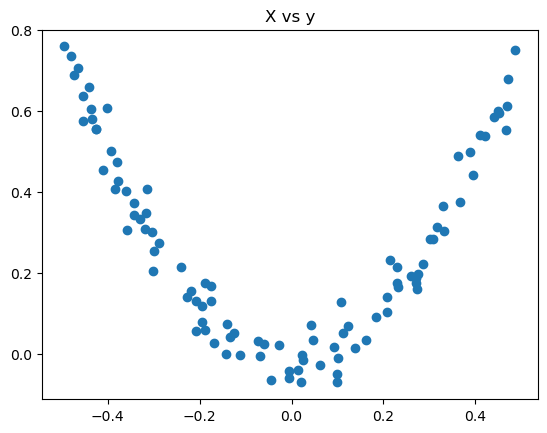

In [31]:
plt.scatter(df["X"],df["y"])
plt.title("X vs y")

In [32]:
df["pred1[base_model]"]=df["y"].mean()

In [33]:
df

,X,y,pred1[base_model]
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


In [36]:
df["res1"]=df["y"]-df["pred1[base_model]"]

In [37]:
df

,X,y,pred1[base_model],res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


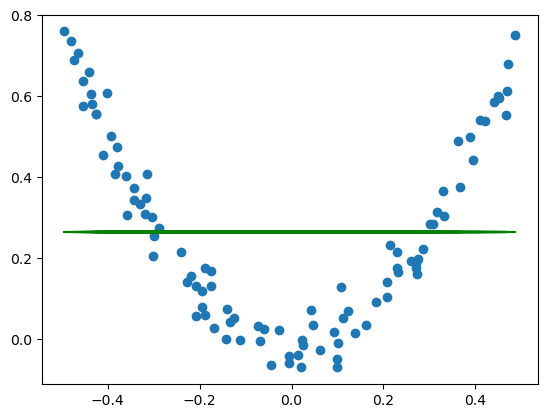

In [38]:
plt.scatter(df["X"],df["y"])
plt.plot(df["X"],df["pred1[base_model]"],color="green")

In [43]:
X=df["X"].values.reshape(100,1)

In [44]:
X

array([[-0.12545988],
       [ 0.45071431],
       [ 0.23199394],
       [ 0.09865848],
       [-0.34398136],
       [-0.34400548],
       [-0.44191639],
       [ 0.36617615],
       [ 0.10111501],
       [ 0.20807258],
       [-0.47941551],
       [ 0.46990985],
       [ 0.33244264],
       [-0.28766089],
       [-0.31817503],
       [-0.31659549],
       [-0.19575776],
       [ 0.02475643],
       [-0.06805498],
       [-0.20877086],
       [ 0.11185289],
       [-0.36050614],
       [-0.20785535],
       [-0.13363816],
       [-0.04393002],
       [ 0.28517596],
       [-0.30032622],
       [ 0.01423444],
       [ 0.09241457],
       [-0.45354959],
       [ 0.10754485],
       [-0.32947588],
       [-0.43494841],
       [ 0.44888554],
       [ 0.46563203],
       [ 0.30839735],
       [-0.19538623],
       [-0.40232789],
       [ 0.18423303],
       [-0.05984751],
       [-0.37796177],
       [-0.00482309],
       [-0.46561148],
       [ 0.4093204 ],
       [-0.24122002],
       [ 0

In [51]:
# i am going to train my first DT model on top of residual

# X, res1

X=df["X"].values.reshape(100,1)

In [57]:
y=df["res1"].values.reshape(100,1)

In [58]:
y

array([[-0.2138855 ],
       [ 0.32902139],
       [-0.09940679],
       [-0.33563635],
       [ 0.07852754],
       [ 0.10741654],
       [ 0.39430659],
       [ 0.110883  ],
       [-0.27521034],
       [-0.16066366],
       [ 0.46982939],
       [ 0.41342497],
       [ 0.03960792],
       [ 0.00845134],
       [ 0.04310154],
       [ 0.08367197],
       [-0.18559775],
       [-0.28000286],
       [-0.27116936],
       [-0.20787833],
       [-0.21311917],
       [ 0.1374884 ],
       [-0.13559118],
       [-0.22361028],
       [-0.33043739],
       [-0.04251468],
       [-0.01200661],
       [-0.3049644 ],
       [-0.24790132],
       [ 0.37186583],
       [-0.13645142],
       [ 0.06893355],
       [ 0.31495947],
       [ 0.33531398],
       [ 0.28904261],
       [ 0.01854268],
       [-0.14791955],
       [ 0.34330689],
       [-0.17325102],
       [-0.23963586],
       [ 0.1613713 ],
       [-0.32382251],
       [ 0.44206489],
       [ 0.27476783],
       [-0.05134551],
       [-0

In [59]:
from sklearn.tree import DecisionTreeRegressor
DT1=DecisionTreeRegressor(max_leaf_nodes=8)
DT1.fit(X,y)

DecisionTreeRegressor(max_leaf_nodes=8)

In [60]:
from sklearn.tree import plot_tree

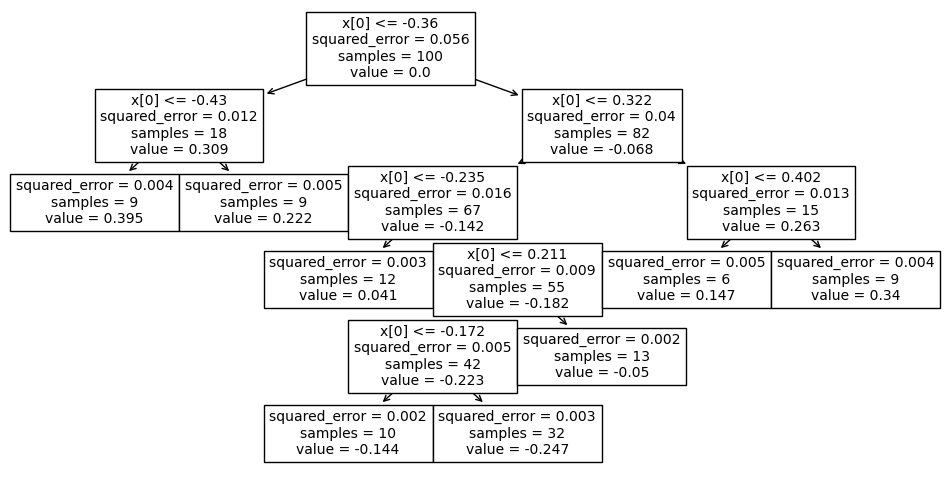

In [61]:
plt.figure(figsize=(12,6))
plot_tree(DT1)
plt.show()


In [62]:
X

array([[-0.12545988],
       [ 0.45071431],
       [ 0.23199394],
       [ 0.09865848],
       [-0.34398136],
       [-0.34400548],
       [-0.44191639],
       [ 0.36617615],
       [ 0.10111501],
       [ 0.20807258],
       [-0.47941551],
       [ 0.46990985],
       [ 0.33244264],
       [-0.28766089],
       [-0.31817503],
       [-0.31659549],
       [-0.19575776],
       [ 0.02475643],
       [-0.06805498],
       [-0.20877086],
       [ 0.11185289],
       [-0.36050614],
       [-0.20785535],
       [-0.13363816],
       [-0.04393002],
       [ 0.28517596],
       [-0.30032622],
       [ 0.01423444],
       [ 0.09241457],
       [-0.45354959],
       [ 0.10754485],
       [-0.32947588],
       [-0.43494841],
       [ 0.44888554],
       [ 0.46563203],
       [ 0.30839735],
       [-0.19538623],
       [-0.40232789],
       [ 0.18423303],
       [-0.05984751],
       [-0.37796177],
       [-0.00482309],
       [-0.46561148],
       [ 0.4093204 ],
       [-0.24122002],
       [ 0

In [63]:
df["pred2"]=DT1.predict(X)

In [64]:
df

,X,y,pred1[base_model],res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,-0.247139
1,0.450714,0.594480,0.265458,0.329021,0.340426
2,0.231994,0.166052,0.265458,-0.099407,-0.049674
3,0.098658,-0.070178,0.265458,-0.335636,-0.247139
4,-0.343981,0.343986,0.265458,0.078528,0.040506
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,-0.247139
96,0.022733,-0.002305,0.265458,-0.267763,-0.247139
97,-0.072459,0.032809,0.265458,-0.232650,-0.247139
98,-0.474581,0.689516,0.265458,0.424057,0.395454


In [66]:
BASE=df["pred1[base_model]"]

In [67]:
alpha=0.1

In [70]:
df["res2"]=df["y"]-(BASE+(alpha*df["pred2"]))

In [71]:
df

,X,y,pred1[base_model],res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,-0.247139,-0.189172
1,0.450714,0.594480,0.265458,0.329021,0.340426,0.294979
2,0.231994,0.166052,0.265458,-0.099407,-0.049674,-0.094439
3,0.098658,-0.070178,0.265458,-0.335636,-0.247139,-0.310922
4,-0.343981,0.343986,0.265458,0.078528,0.040506,0.074477
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,-0.247139,-0.281420
96,0.022733,-0.002305,0.265458,-0.267763,-0.247139,-0.243049
97,-0.072459,0.032809,0.265458,-0.232650,-0.247139,-0.207936
98,-0.474581,0.689516,0.265458,0.424057,0.395454,0.384512


In [72]:
X=df["X"].values.reshape(100,1)
y=df["res2"].values

In [73]:
X

array([[-0.12545988],
       [ 0.45071431],
       [ 0.23199394],
       [ 0.09865848],
       [-0.34398136],
       [-0.34400548],
       [-0.44191639],
       [ 0.36617615],
       [ 0.10111501],
       [ 0.20807258],
       [-0.47941551],
       [ 0.46990985],
       [ 0.33244264],
       [-0.28766089],
       [-0.31817503],
       [-0.31659549],
       [-0.19575776],
       [ 0.02475643],
       [-0.06805498],
       [-0.20877086],
       [ 0.11185289],
       [-0.36050614],
       [-0.20785535],
       [-0.13363816],
       [-0.04393002],
       [ 0.28517596],
       [-0.30032622],
       [ 0.01423444],
       [ 0.09241457],
       [-0.45354959],
       [ 0.10754485],
       [-0.32947588],
       [-0.43494841],
       [ 0.44888554],
       [ 0.46563203],
       [ 0.30839735],
       [-0.19538623],
       [-0.40232789],
       [ 0.18423303],
       [-0.05984751],
       [-0.37796177],
       [-0.00482309],
       [-0.46561148],
       [ 0.4093204 ],
       [-0.24122002],
       [ 0

In [74]:
y

array([-0.18917161,  0.29497884, -0.09443935, -0.31092247,  0.07447691,
        0.10336592,  0.35476119,  0.09616931, -0.25049645, -0.13594977,
        0.430284  ,  0.37938241,  0.02489423,  0.00440072,  0.03905091,
        0.07962134, -0.1712113 , -0.25528897, -0.24645548, -0.19349187,
       -0.18840529,  0.11525455, -0.12120473, -0.1988964 , -0.30572351,
       -0.03754724, -0.01605723, -0.28025052, -0.22318744,  0.33232044,
       -0.11173753,  0.06488293,  0.27541408,  0.30127143,  0.25500006,
        0.02351012, -0.13353309,  0.32107305, -0.14853713, -0.21492197,
        0.13913746, -0.29910862,  0.4025195 ,  0.24072528, -0.05539613,
       -0.2069734 , -0.07457407, -0.30962889, -0.2048561 ,  0.13796391,
        0.3125014 , -0.06171163,  0.28495958,  0.16232004, -0.28952446,
        0.23786081,  0.16720784,  0.03144986,  0.26947965, -0.08204674,
       -0.24272894, -0.11033122,  0.08470883, -0.2407289 , -0.09572988,
       -0.16991851,  0.03692306,  0.02270978,  0.26832337,  0.45

In [78]:
from sklearn.tree import DecisionTreeRegressor
DT2=DecisionTreeRegressor(max_leaf_nodes=8)
DT2.fit(X,y)

DecisionTreeRegressor(max_leaf_nodes=8)

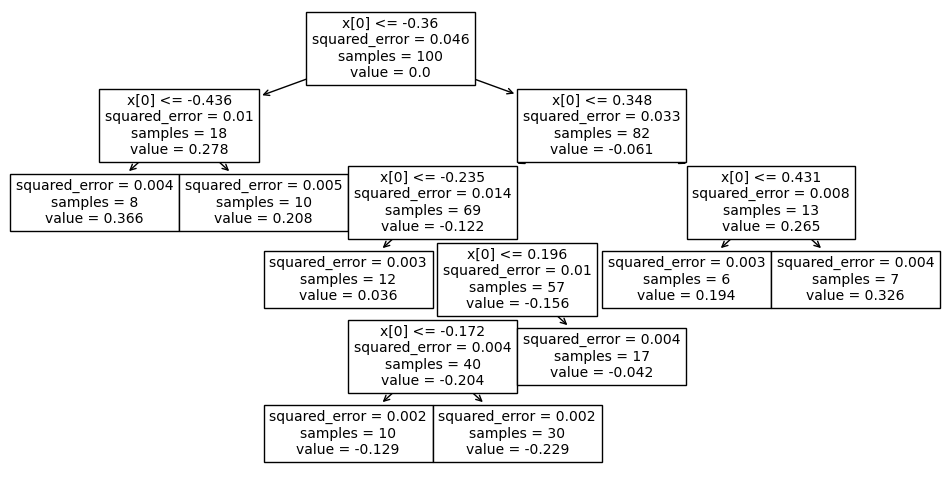

In [79]:
plt.figure(figsize=(12,6))
plot_tree(DT2)
plt.show()


In [ ]:
## res3

## and you need to check it getting reduced or not

In [80]:
final_pred = BASE + (alpha*DT1) + (alpha*DT2)

TypeError: unsupported operand type(s) for *: 'float' and 'DecisionTreeRegressor'

In [81]:
query=[[0.45071431]]

In [82]:
pred1=DT1.predict(query)

In [83]:
pred1

array([0.34042552])

In [84]:
pred2=DT2.predict(query)

In [85]:
pred2

array([0.32555151])

In [86]:
alpha

0.1

In [87]:
BASE[0]

0.26545839669679816

In [88]:
final_pred=BASE[0]+(alpha*pred1)+(alpha*pred2)

In [89]:
final_pred

array([0.3320561])

In [ ]:
# final_model = BASE + alpha*(DT1) + alpha*(DT2) + alpha*(DT3) + alpha*(DT4) + --------

In [90]:
#unknown test data
X_test=np.linspace(-0.5,0.5,500)

In [91]:
X_test

array([-0.5       , -0.49799599, -0.49599198, -0.49398798, -0.49198397,
       -0.48997996, -0.48797595, -0.48597194, -0.48396794, -0.48196393,
       -0.47995992, -0.47795591, -0.4759519 , -0.4739479 , -0.47194389,
       -0.46993988, -0.46793587, -0.46593186, -0.46392786, -0.46192385,
       -0.45991984, -0.45791583, -0.45591182, -0.45390782, -0.45190381,
       -0.4498998 , -0.44789579, -0.44589178, -0.44388778, -0.44188377,
       -0.43987976, -0.43787575, -0.43587174, -0.43386774, -0.43186373,
       -0.42985972, -0.42785571, -0.4258517 , -0.4238477 , -0.42184369,
       -0.41983968, -0.41783567, -0.41583166, -0.41382766, -0.41182365,
       -0.40981964, -0.40781563, -0.40581162, -0.40380762, -0.40180361,
       -0.3997996 , -0.39779559, -0.39579158, -0.39378758, -0.39178357,
       -0.38977956, -0.38777555, -0.38577154, -0.38376754, -0.38176353,
       -0.37975952, -0.37775551, -0.3757515 , -0.37374749, -0.37174349,
       -0.36973948, -0.36773547, -0.36573146, -0.36372745, -0.36

In [93]:
BASE=df["pred1[base_model]"]

In [94]:
alpha=0.1

In [98]:
#without alpha(LR)
y_pred1=BASE[0]+(DT1.predict(X_test.reshape(500,1)))

In [102]:
#with alpha
y_pred2=BASE[0]+(alpha*DT1.predict(X_test.reshape(500,1)))

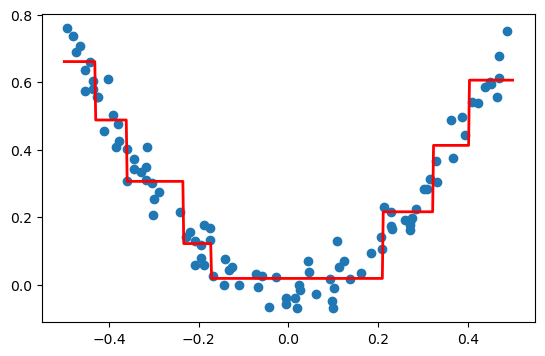

In [100]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred1, linewidth=2,color='red')
plt.scatter(df["X"],df["y"])

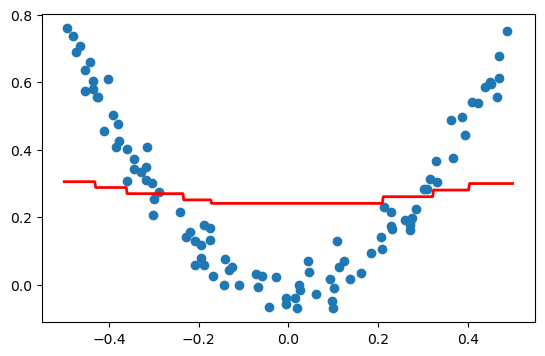

In [103]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred2, linewidth=2,color='red')
plt.scatter(df["X"],df["y"])

In [104]:
DT1.score(X,y)

0.9160800823923317